In [1]:
import numpy as np

def generate_data(m, n, seed=42):

    np.random.seed(seed)
    A = np.random.randn(m, n)
    x_true = np.random.randn(n)
    b = A @ x_true + np.random.normal(0, 0.1, m)
    return A, b, x_true

def normal_solver(A, b):

    ATA = A.T @ A
    ATb = A.T @ b

    n = ATA.shape[0]
    L = np.zeros((n, n))
    
    # Cholesky分解
    for i in range(n):
        for j in range(i+1):
            if i == j:
                sum_val = sum(L[i, k] ** 2 for k in range(j))
                L[i, i] = np.sqrt(ATA[i, i] - sum_val)
            else:
                sum_val = sum(L[i, k] * L[j, k] for k in range(j))
                L[i, j] = (ATA[i, j] - sum_val) / L[j, j]
    
    # 前代
    y = np.zeros(n)
    for i in range(n):
        y[i] = (ATb[i] - sum(L[i, j] * y[j] for j in range(i))) / L[i, i]
    
    # 后代
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - sum(L[j, i] * x[j] for j in range(i+1, n))) / L[i, i]
    
    return x

def qr(A):

    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    V = A.copy()
    
    # 对每一列进行处理
    for i in range(n):

        R[i, i] = np.sqrt(np.sum(V[:, i] ** 2))
        Q[:, i] = V[:, i] / R[i, i]
        

        for j in range(i + 1, n):
            R[i, j] = np.dot(Q[:, i], V[:, j])
            V[:, j] = V[:, j] - R[i, j] * Q[:, i]
    
    return Q, R

def qr_solver(A, b):
#R1x = Q1Tb
    Q, R = qr(A)
    n = A.shape[1]
    Q1 = Q[:,0:n]
    R1 = R[0:n,0:n]
    b = Q1.T @ b

    x = np.zeros(n)
    
    for i in range(n-1, -1, -1):
        sum_val = sum(R1[i, j] * x[j] for j in range(i+1, n))
        x[i] = (b[i] - sum_val) / R[i, i]
    
    return x


def svd(A, max_iter=1000, tol=1e-10):

    m, n = A.shape
    U = np.zeros((m, min(m, n)))
    S = np.zeros(min(m, n))
    VT = np.zeros((min(m, n), n))
    

    ATA = A.T @ A
    AAT = A @ A.T
    
    # 对每个奇异值进行计算
    for i in range(min(m, n)):

        v = np.random.randn(n)
        v = v / np.linalg.norm(v)
        
        for _ in range(max_iter):
            v_new = ATA @ v
            v_new = v_new / np.linalg.norm(v_new)
            
            if np.linalg.norm(v_new - v) < tol:
                break
            v = v_new
        

        VT[i, :] = v
        S[i] = np.sqrt(v.T @ ATA @ v)
        U[:, i] = (A @ v) / S[i]
        

        A = A - S[i] * np.outer(U[:, i], VT[i, :])
    
    return U, S, VT


def svd_solver(A, b):
    n = A.shape[1]
    U, S, VT = svd(A)
    U1 = U[:, 0:n]
    b1 = U1.T @ b
    S1_inv = np.diag(1.0 / S[0:n])
    x = S1_inv @ b1 @ VT.T
    
    return x


# 生成测试数据
m, n = 8,  4 
A, b, x_true = generate_data(m, n)

# 使用不同方法求解
x_normal = normal_solver(A, b)
x_qr = qr_solver(A, b)
x_svd = svd_solver(A, b)

print("\n最小二乘解为:")
print(f"正规方程法: {np.linalg.norm(x_normal):.6f}")
print(f"QR分解法: {np.linalg.norm(x_qr):.6f}")
print(f"SVD分解法: {np.linalg.norm(x_svd):.6f}")

# 计算误差
print("\n与真实解的误差:")
print(f"正规方程法: {np.linalg.norm(x_normal - x_true):.6f}")
print(f"QR分解法: {np.linalg.norm(x_qr - x_true):.6f}")
print(f"SVD分解法: {np.linalg.norm(x_svd - x_true):.6f}")

# 计算残差
print("\n残差:")
print(f"正规方程法: {np.linalg.norm(A @ x_normal - b):.6f}")
print(f"QR分解法: {np.linalg.norm(A @ x_qr - b):.6f}")
print(f"SVD分解法: {np.linalg.norm(A @ x_svd - b):.6f}")



最小二乘解为:
正规方程法: 1.766267
QR分解法: 1.766267
SVD分解法: 0.030568

与真实解的误差:
正规方程法: 0.088006
QR分解法: 0.088006
SVD分解法: 1.807530

残差:
正规方程法: 0.206042
QR分解法: 0.206042
SVD分解法: 4.088801


最小二乘误差: 1.580301

多项式系数 (从低次到高次):
x^0: 0.474150
x^1: -1.528947
x^2: 1.232226
x^3: -0.240070
x^4: 0.013263


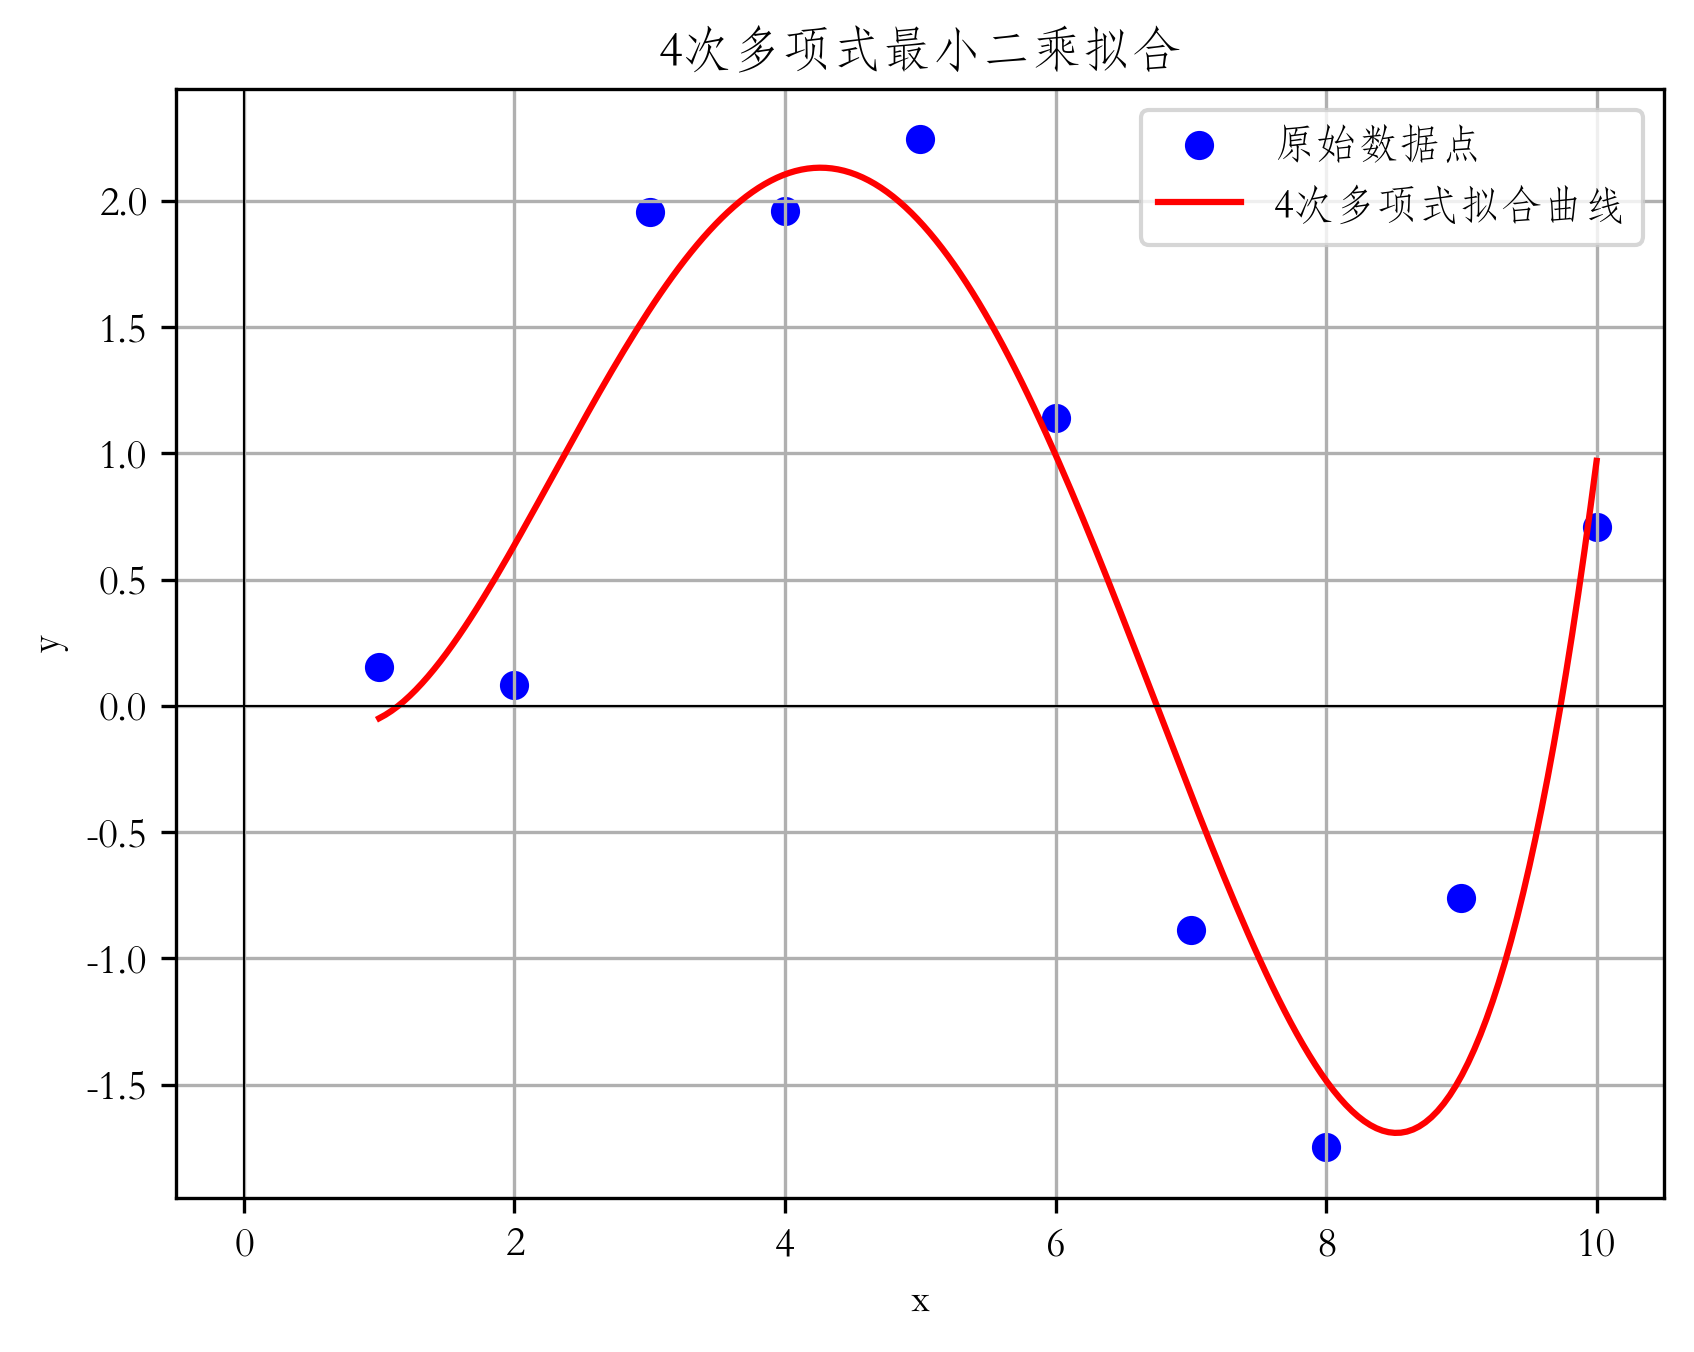


拟合多项式:
p(x) = 0.4741 -1.5289x +1.2322x^2 -0.2401x^3 +0.0133x^4


In [26]:

import matplotlib.pyplot as plt
from numpy.linalg import solve
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.sans-serif'] = ['STFangsong']  # 图中显示中文
plt.rcParams['axes.unicode_minus'] = False  # 图中正常显示负号

# 1. 准备数据
x = np.array([i for i in range(1, 11)]) 
y = np.array([0.1552, 0.0804, 1.9574, 1.9598, 2.2433, 
              1.1384, -0.8888, -1.7492, -0.7607, 0.7075])

# 2. 构建范德蒙德矩阵
def build_vandermonde(x, degree):
    A = np.zeros((len(x), degree + 1))
    for i in range(degree + 1):
        A[:, i] = x ** i
    return A

# 3. 最小二乘求解
degree = 4  
A = build_vandermonde(x, degree)
coefficients = solve(A.T @ A, A.T @ y)

# 4.计算拟合值和误差
y_fit = A @ coefficients
error = np.sum((y - y_fit) ** 2)
print(f"最小二乘误差: {error:.6f}")
print("\n多项式系数 (从低次到高次):")
for i, coef in enumerate(coefficients):
    print(f"x^{i}: {coef:.6f}")

# 绘图
plt.figure()
plt.scatter(x, y, color='blue', label='原始数据点')
x_smooth = np.linspace(min(x), max(x), 200)
A_smooth = build_vandermonde(x_smooth, degree)
y_smooth = A_smooth @ coefficients


plt.plot(x_smooth, y_smooth, 'r-', label='4次多项式拟合曲线')

plt.xlabel('x')
plt.ylabel('y')
plt.title('4次多项式最小二乘拟合')
plt.grid(True)
plt.legend()

plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)

plt.show()

def format_polynomial(coefficients):

    terms = []
    for i, coef in enumerate(coefficients):
        if abs(coef) < 1e-10:  # 忽略接近0的系数
            continue
        if i == 0:
            terms.append(f"{coef:.4f}")
        elif i == 1:
            terms.append(f"{coef:+.4f}x")
        else:
            terms.append(f"{coef:+.4f}x^{i}")
    return " ".join(terms)

print("\n拟合多项式:")
print(f"p(x) = {format_polynomial(coefficients)}")